In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/iris.csv")

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
X = df.drop('target',axis =1).values
y = df.target.values

In [5]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y[:5]

array([0., 0., 0., 0., 0.])

## Using Sklearn Train Test Split for Tabular Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
X_train[:5]

array([[6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2.8, 5.1, 2.4]])

In [10]:
y_train[:5].reshape(-1,1)

array([[1.],
       [2.],
       [1.],
       [2.],
       [2.]])

Here the data is small and we where able to load all them at once. what if the data is large and we want to load it in batches. For this a simpler method is to use DataLoader.

### Using Pytorch inbuild data loading functions

In [11]:
from torch.utils.data import TensorDataset, DataLoader

In [12]:
print(help(DataLoader))

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(builtins.object)
 |  DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, multiprocessing_context=None)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuff

We can specify the number of batches in which data needs to be split and we can shuffle the data before inputting it into our model

In [13]:
features = df.drop('target',axis=1).values
target = df.target.values

In [14]:
iris= TensorDataset(torch.FloatTensor(features),torch.LongTensor(target))

In [15]:
iris_loader = DataLoader(iris,batch_size=50,shuffle = True)

In [16]:
for i,batch in enumerate(iris_loader):
    print(i,batch)

0 [tensor([[6.7000, 3.1000, 5.6000, 2.4000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [6.5000, 3.0000, 5.2000

Divides the dataset with 150 entries into 3 batches (Specified Batch size =50) and shuffled the data and created test train split more effectively than the above method.

This data can be send to our model 50 examples at a time.

## ANN

In [17]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=6,h2=3,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [18]:
model = Model()

In [19]:
model

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=3, bias=True)
  (out): Linear(in_features=3, out_features=3, bias=True)
)

In [20]:
model.fc1.weight

Parameter containing:
tensor([[ 0.2376, -0.0879, -0.0915,  0.3626],
        [ 0.2472, -0.2576,  0.2385, -0.1738],
        [-0.4534, -0.3402,  0.1171,  0.0327],
        [-0.4450, -0.4571, -0.4225, -0.2827],
        [-0.0142,  0.0934,  0.0549, -0.2397],
        [ 0.4406, -0.2365,  0.1471, -0.3460]], requires_grad=True)

In [21]:
model.fc1.bias

Parameter containing:
tensor([ 0.0931,  0.2283, -0.2173,  0.1714,  0.1598, -0.0328],
       requires_grad=True)

- Shape of the weight tensor between input(4,1) and h1 (6,1) is (4,6)
- Shape of the bias tensor between input(4,1) and h1(6,1) is depended on h1. It has 6 values corresponding to each neuron in h1.

In [22]:
features = torch.FloatTensor(features)
target = torch.LongTensor(target)

In [23]:
X_train, X_test, y_train, y_test=train_test_split(features,target,random_state=59,test_size=0.2)

In [24]:
# Classification problem => Evaluated based on Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

#Epochs
epochs = 200
losses = []

for i in range(epochs):
    
    ypred = model.forward(X_train)
    
    loss = criterion(ypred,y_train)
    #Keeping track of loss
    losses.append(loss.item())
    

    if i%10==0:
        print(f'Epoch:{i},loss:{loss:.2f}')
        
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0,loss:1.10
Epoch:10,loss:1.02
Epoch:20,loss:0.90
Epoch:30,loss:0.78
Epoch:40,loss:0.69
Epoch:50,loss:0.63
Epoch:60,loss:0.57
Epoch:70,loss:0.50
Epoch:80,loss:0.40
Epoch:90,loss:0.30
Epoch:100,loss:0.23
Epoch:110,loss:0.19
Epoch:120,loss:0.16
Epoch:130,loss:0.14
Epoch:140,loss:0.13
Epoch:150,loss:0.12
Epoch:160,loss:0.12
Epoch:170,loss:0.11
Epoch:180,loss:0.10
Epoch:190,loss:0.10


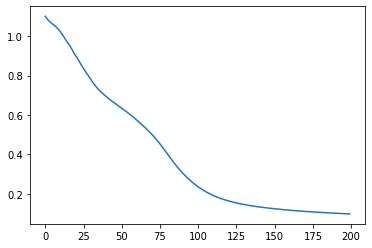

In [25]:
plt.plot(range(epochs),losses)
plt.show()

## Predicting performance on unseen data

In [26]:
with torch.no_grad():
    yval = model.forward(X_test)
    loss=criterion(yval,y_test)

In [27]:
loss

tensor(0.0518)

In [28]:
correct =0
for i,data in enumerate(X_test):
    yval = model.forward(data)
    
    print(f"Predicted:{yval.argmax()} Actual:{y_test[i]}")
    if yval.argmax().item()== y_test[i]:
        correct+=1
    
print(f"We got {correct} Correct! out of {len(X_test)}")
    

Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:2 Actual:2
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
We got 30 Correct! out of 30
